<a href="https://colab.research.google.com/github/monsieurshiva/AdvancedDeepLearning/blob/main/TransferLearning/Transfer_Learning_VGG16_with_Keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning VGG16 with Keras Functional API

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages. We will create a transfer learning model to identify image classes.

For this we will use the **[Plant Seedlings Dataset](https://www.kaggle.com/competitions/plant-seedlings-classification/data)** from **Kaggle**.

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras import applications
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as K 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

## Load Dataset

In [3]:
os.chdir('/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/Session 1 and 2/train')

In [4]:
Label_names=os.listdir()
Label_names

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

## Train Test Split

In [5]:
x_train = []
y_train = []
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):  #checking valid folder or not
            for j in os.listdir(i):
                try:
                    dummy = cv2.imread('/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/Session 1 and 2/train/' + i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    x_train.append(dummy)
                    y_train.append(i)
                except Exception as e:
                    print(e)


Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [6]:
dum = pd.get_dummies(y_train)
y_train = dum
y_train = np.array(y_train)

In [7]:
x_train = np.array(x_train)


In [8]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))

3800
950


In [9]:
#Normalize the data
x_train2 = x_train2/255.
x_val = x_val/255.

##Define the Model

In [10]:
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))

In [11]:
# Freeze the layers which you don't want to train. In this we are freezing the first 10 layers.
for layer in model.layers[:10]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
predictions = Dense(12, activation="softmax")(x)

# creating the final model 
model_final = Model(model.input,predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer ='SGD', metrics=["accuracy"])


In [12]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [13]:
# Save the model 
checkpoint = ModelCheckpoint("/content/drive/My Drive/DL/vgg16_best5.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
#an absolute change of less than min_delta , will count as no improvement (threshold value)
epochs=20
# Train the model 
model_final.fit(x_train2, y_train2, epochs = epochs, validation_data=(x_val, y_val), callbacks = [checkpoint, early])

Epoch 1/20
119/119 [==============================] - ETA: 0s - loss: 2.3473 - accuracy: 0.1813
Epoch 1: accuracy improved from -inf to 0.18132, saving model to /content/drive/My Drive/DL/vgg16_best5.h5
119/119 [==============================] - 24s 121ms/step - loss: 2.3473 - accuracy: 0.1813 - val_loss: 2.1693 - val_accuracy: 0.2221
Epoch 2/20
119/119 [==============================] - ETA: 0s - loss: 1.9609 - accuracy: 0.3387
Epoch 2: accuracy improved from 0.18132 to 0.33868, saving model to /content/drive/My Drive/DL/vgg16_best5.h5
119/119 [==============================] - 12s 103ms/step - loss: 1.9609 - accuracy: 0.3387 - val_loss: 1.6159 - val_accuracy: 0.4242
Epoch 3/20
119/119 [==============================] - ETA: 0s - loss: 1.5865 - accuracy: 0.4550
Epoch 3: accuracy improved from 0.33868 to 0.45500, saving model to /content/drive/My Drive/DL/vgg16_best5.h5
119/119 [==============================] - 11s 92ms/step - loss: 1.5865 - accuracy: 0.4550 - val_loss: 1.3900 - val_a

##Loading the saved model and Testing cases

In [14]:
trained_model=keras.models.load_model('/content/drive/My Drive/DL/vgg16_best5.h5')

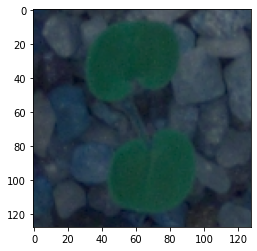

In [15]:
plt.imshow(x_val[0])

In [16]:
y_pred=trained_model.predict(x_val)

30/30 [==============================] - 2s 43ms/step


In [17]:
y_pred[0]

array([6.6858850e-13, 3.7891332e-05, 8.7184279e-05, 1.7547836e-11,
       4.0965937e-12, 4.9776579e-11, 1.0605271e-06, 2.3306402e-05,
       5.1830806e-10, 1.0228133e-06, 9.9984920e-01, 2.0395080e-07],
      dtype=float32)

In [18]:
print('The predicted class is ',Label_names[np.argmax(y_pred[0])])
print('The actual class is ',Label_names[np.argmax(y_val[0])])


The predicted class is  Small-flowered Cranesbill
The actual class is  Small-flowered Cranesbill


## Metrics

In [19]:
y_label=[]
for i in np.arange(y_pred.shape[0]):
  y_label.append(np.argmax(y_pred[i]))

In [20]:
y_actual=[]
for i in np.arange(y_val.shape[0]):
  y_actual.append(np.argmax(y_val[i]))

In [21]:

cr=metrics.classification_report(y_actual,y_label)
print(cr)

              precision    recall  f1-score   support

           0       0.47      0.60      0.53        55
           1       0.90      0.97      0.93        90
           2       0.80      0.83      0.82        59
           3       0.95      0.87      0.91       120
           4       0.76      0.77      0.76        48
           5       0.94      0.63      0.76       104
           6       0.84      0.78      0.81       121
           7       0.82      0.80      0.81        45
           8       0.87      0.79      0.83        95
           9       0.85      0.77      0.81        44
          10       0.97      0.97      0.97        93
          11       0.60      0.93      0.73        76

    accuracy                           0.82       950
   macro avg       0.81      0.81      0.80       950
weighted avg       0.84      0.82      0.82       950



The model works fairly accurate. The prediction capabilities lag in consideration to classes 0,6,7 and 8

In [22]:
cm=metrics.confusion_matrix(y_actual,y_label)
print(cm)

[[ 33   0   0   0   4   0  17   0   1   0   0   0]
 [  0  87   1   0   0   0   0   1   0   0   0   1]
 [  0   5  49   0   1   0   0   3   0   0   0   1]
 [  1   0   0 104   0   0   0   0   6   5   2   2]
 [ 10   0   0   0  37   1   0   0   0   0   0   0]
 [  0   1   2   1   2  66   0   0   0   0   0  32]
 [ 26   0   0   0   1   0  94   0   0   0   0   0]
 [  0   0   0   0   3   0   0  36   0   0   0   6]
 [  0   0   9   3   0   1   1   1  75   1   0   4]
 [  0   3   0   0   0   1   0   0   4  34   1   1]
 [  0   1   0   1   0   0   0   0   0   0  90   1]
 [  0   0   0   0   1   1   0   3   0   0   0  71]]
